In [70]:
"""
from __future__ import absolute_import, division, print_function
%matplotlib inline
import matplotlib.pyplot as plt
#import seaborn as sns
import pandas as pd
import numpy as np
import pathlib
import tensorflow as tf
import pickle
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, mean_absolute_error, r2_score
import csv
import matplotlib.pyplot as plt
"""
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


ModuleNotFoundError: No module named 'tensorflow'

In [9]:
pd.set_option('display.max_columns', None)

# Import data

In [3]:
# read an excel file and convert  
# into a dataframe object 
train_data = pd.DataFrame(pd.read_csv(r"/Users/tyleremanuel/Downloads/final_where_missed.csv"))

In [ ]:
print(train_data.head())
print(train_data.columns)

# Split train test datasets

In [25]:
col_list = train_data.columns[2:]

In [ ]:
x=train_data[col_list]
y=train_data[['expectedPointsAdded']]
x.drop(columns=["playResult",'expectedPointsAdded', 'expectedPoints'],inplace=True )

In [60]:
def clock_to_seconds(x):
    min, sec = x['gameClock'].split(":")[0], x['gameClock'].split(":")[1]
    game_seconds = float(min) * 60 + float(sec)
    return 3600 - (900 - game_seconds) - (900 * (x['quarter'] - 1))

In [ ]:
x['secondsLeft'] = x.apply(clock_to_seconds, axis=1)

In [ ]:
x.drop(columns=["quarter", "Result", "gameClock"], inplace=True)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(x,y, train_size=0.8, shuffle = True)
print(X_train.shape)

(1581, 158)


In [ ]:
# Scale data
scaler_train = MinMaxScaler()
train_X = scaler_train.fit_transform(X_train)
print(train_X)

[[0.55597015 0.28634361 0.90784572 0.00504136 0.07132689 0.7573964 ]
 [0.60820896 0.33480176 0.40424006 0.00749318 0.9991161  0.53002448]
 [0.57835821 0.31057269 0.40493248 0.08336602 0.00147287 0.46141227]
 ...
 [0.05223881 0.16740088 0.40438362 0.00904147 0.00969424 0.40192873]
 [0.5261194  0.27092511 0.40424456 0.0050351  0.07132689 0.7573964 ]
 [0.05223881 0.15859031 0.40444725 0.03044012 0.02237708 0.64796335]]


In [ ]:
scaler_valid = MinMaxScaler()
valid_X = scaler_valid.fit_transform(X_valid)
print(valid_X)

[[0.53358209 0.26651982 0.40424448 0.28802155 0.01539311 0.62318064]
 [0.6119403  0.27092511 0.68633156 0.01055711 0.18968383 0.8920599 ]
 [0.65671642 0.25550661 0.40419885 0.02363371 0.04713219 0.2880428 ]
 ...
 [0.29850746 0.31718062 0.97894919 0.00202989 0.29192999 0.95465378]
 [0.6641791  0.22907489 0.40421526 0.05758078 0.03062761 0.32764631]
 [0.52238806 0.47577093 0.43149366 0.01597435 0.93725659 0.74252992]]


In [ ]:
scaler_predict = MinMaxScaler()
predict_X = scaler_predict.fit_transform(X_test)
print(predict_X)

[[0.50746269 0.469163   0.43149295 0.00602435 0.30766036 0.0384719 ]
 [0.48880597 0.37885463 0.43138517 0.00737633 0.08514621 0.77912186]
 [0.35820896 0.32819383 0.40434182 0.31215234 0.16991178 0.87556597]
 ...
 [0.73507463 0.29955947 0.40414161 0.01114389 0.00661653 0.58118307]
 [0.01865672 0.10792952 0.4043764  0.02786078 0.08041567 0.77195948]
 [0.05223881 0.17180617 0.40438372 0.35370007 0.41458198 0.99265028]]


In [ ]:
y_train = y_train.to_numpy().reshape(-1,1)
y_valid = y_valid.to_numpy().reshape(-1,1)
y_test = y_test.to_numpy().reshape(-1,1)

In [ ]:
scaler_train_labels = MinMaxScaler()
train_y = scaler_train_labels.fit_transform(y_train)
print(train_y)

[[0.        ]
 [0.        ]
 [0.06016367]
 ...
 [0.        ]
 [0.00507374]
 [0.03067374]]


In [ ]:
scaler_valid_labels = MinMaxScaler()
valid_y = scaler_valid_labels.fit_transform(y_valid)
print(valid_y)

[[0.04194495]
 [0.        ]
 [0.        ]
 ...
 [0.        ]
 [0.0578244 ]
 [0.        ]]


In [ ]:
scaler_test_labels = MinMaxScaler()
test_y = scaler_test_labels.fit_transform(y_test)
print(test_y)

[[0.        ]
 [0.        ]
 [0.        ]
 ...
 [0.        ]
 [0.02648254]
 [0.        ]]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(1000, input_dim=train_X.shape[1], activation='relu'))
model.add(Dense(1000,activation='relu'))
model.add(Dense(1000,activation='relu'))
model.add(Dense(2,activation='softmax'))
#model.summary()
#binary
#model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.0001),metrics =['accuracy'])
#monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto', restore_best_weights=True)
#model.fit(train_x,train_y,validation_data=(valid_x,valid_y),verbose=2,epochs=100)
#sparse
model.compile(loss='mean_squared_error',optimizer=Adam(learning_rate=0.0001),metrics =['accuracy'])
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto', restore_best_weights=True)
model.fit(train_X,train_y,validation_data=(valid_X,valid_y),callbacks=[monitor],verbose=2,epochs=50)

Epoch 1/50
769832/769832 - 10149s - loss: 0.2292 - accuracy: 0.3325 - val_loss: 0.2292 - val_accuracy: 0.0771 - 10149s/epoch - 13ms/step
Epoch 2/50
769832/769832 - 10116s - loss: 0.2292 - accuracy: 0.3327 - val_loss: 0.2292 - val_accuracy: 0.4237 - 10116s/epoch - 13ms/step
Epoch 3/50


KeyboardInterrupt: ignored

In [ ]:
def prep_input_dataset(data,year1,year2):
    
    #del data["HIGH_T"]
    #del data["LOW_T"]
    #del data["BEACH_NM"]
    #del data["latitude"] 
    #del data["longitude"]
    train_data=data.loc[(data['PERIOD_DT'] < year1)]
    test_data=data.loc[(data['PERIOD_DT'] >= year2)]
    
    days_in_year = 365

    train_data['SIN_TIME'] = np.sin(2*np.pi*data.DOY/days_in_year)
    train_data['COS_TIME'] = np.cos(2*np.pi*data.DOY/days_in_year)
    del train_data['PERIOD_DT']
    del train_data['DOY']
    del train_data["HIGH_T"]
    del train_data["LOW_T"]
    del train_data["BEACH_NM"]
    del train_data["latitude"] 
    del train_data["longitude"]
    
    test_data['SIN_TIME'] = np.sin(2*np.pi*data.DOY/days_in_year)
    test_data['COS_TIME'] = np.cos(2*np.pi*data.DOY/days_in_year)
    del test_data['PERIOD_DT']
    del test_data['DOY']
    del test_data["HIGH_T"]
    del test_data["LOW_T"]
    del test_data["BEACH_NM"]
    del test_data["latitude"] 
    del test_data["longitude"]
    
    #Create labels
    train_MC = train_data.pop('MC')
    train_label = train_data.pop('WARNING')
    test_MC = test_data.pop('MC')
    test_label = test_data.pop('WARNING')
    return train_data, train_label, test_data, test_label

In [ ]:
#Scale Comment out
#scaler = MinMaxScaler()
#scaler = StandardScaler()
# transform data
#x_train_orig = scaler.fit_transform(train_data_orig)
#x_pred_orig = scaler.fit_transform(test_data_orig)
#y_train_orig = train_label_orig.to_numpy()
#y_pred_orig = test_label_orig.to_numpy()

# Neural Network

In [ ]:
valid_data_orig=Data_No_Trans.loc[(Data_No_Trans['PERIOD_DT'] >= '2020-01-01')
                     & (Data_No_Trans['PERIOD_DT'] < '2021-01-01')]
valid_data_orig.tail()

,PERIOD_DT,latitude,longitude,DOY,WARNING,AVG_T,PRECIP,Row_Crop,CRP_grass,Pasture,Developed,Timber,Parkland,Wetland,Other,Lake_Volume,Lake_Surface
3824,2020-09-02,42.768378,-93.244366,246,0,60.50,0.00,17640,910.0,430,1120.0,160,0.0,0,220.0,860.0,100.0
3825,2020-09-02,43.111086,-93.396140,246,0,62.50,0.00,4693,1846.0,315,1789.0,467,0.0,730,43.0,34800.0,3625.0
3826,2020-09-02,41.103881,-94.386199,246,0,60.40,0.50,3538,433.0,75,164.0,286,286.0,0,0.0,4056.0,386.0
3828,2020-09-02,41.742616,-92.851570,246,0,64.45,0.01,15701,1555.0,6303,887.0,781,1697.0,0,0.0,3618.0,446.0
3829,2020-09-02,42.129030,-92.722883,246,0,63.05,0.05,5321,300.0,413,129.0,217,284.0,37,0.0,744.0,96.0


In [ ]:
valid_label_orig = valid_data_orig.pop('WARNING')
del valid_data_orig['PERIOD_DT']
print(valid_data_orig.shape, valid_label_orig.shape)

(222, 15) (222,)


In [ ]:
# Scale data
scaler_train = MinMaxScaler()
train_x = scaler_train.fit_transform(train_data_orig)
print(train_x)

[[8.64e-01 6.12e-01 2.52e-02 ... 5.24e-01 3.96e-03 1.12e-02]
 [4.86e-01 5.08e-01 2.52e-02 ... 5.55e-02 4.06e-01 1.95e-01]
 [5.73e-01 0.00e+00 2.52e-02 ... 1.33e-01 1.44e-02 5.72e-02]
 ...
 [4.43e-02 3.09e-01 6.42e-01 ... 0.00e+00 6.90e-03 1.04e-02]
 [0.00e+00 5.02e-01 6.42e-01 ... 0.00e+00 1.47e-04 0.00e+00]
 [6.09e-01 7.21e-01 6.42e-01 ... 0.00e+00 5.58e-04 1.01e-02]]


In [ ]:
scaler_valid = MinMaxScaler()
valid_x = scaler_valid.fit_transform(valid_data_orig)
print(valid_x)

[[0.00e+00 3.97e-01 0.00e+00 ... 0.00e+00 1.47e-04 0.00e+00]
 [4.55e-01 6.48e-01 0.00e+00 ... 0.00e+00 8.49e-02 1.08e-01]
 [6.09e-01 6.83e-01 0.00e+00 ... 0.00e+00 5.58e-04 1.01e-02]
 ...
 [2.01e-01 2.28e-01 1.00e+00 ... 0.00e+00 9.78e-02 9.14e-02]
 [4.55e-01 6.48e-01 1.00e+00 ... 0.00e+00 8.49e-02 1.08e-01]
 [6.09e-01 6.83e-01 1.00e+00 ... 0.00e+00 5.58e-04 1.01e-02]]


In [ ]:
scaler_predict = MinMaxScaler()
predict_x = scaler_predict.fit_transform(test_data_orig)
print(predict_x)

[[8.64e-01 4.89e-01 0.00e+00 ... 5.24e-01 3.96e-03 1.12e-02]
 [1.00e+00 4.47e-01 0.00e+00 ... 1.02e-01 1.00e+00 1.00e+00]
 [4.86e-01 3.52e-01 1.00e-02 ... 5.55e-02 4.06e-01 1.95e-01]
 ...
 [2.01e-01 1.74e-01 1.00e+00 ... 0.00e+00 9.78e-02 9.14e-02]
 [4.43e-02 9.08e-02 1.00e+00 ... 0.00e+00 6.90e-03 1.04e-02]
 [6.09e-01 6.33e-01 1.00e+00 ... 0.00e+00 5.58e-04 1.01e-02]]


In [ ]:
# Trasform dataframe to numpy array
train_y = train_label_orig.to_numpy().reshape(-1,1)
valid_y = valid_label_orig.to_numpy().reshape(-1,1)
predict_y = test_label_orig.to_numpy().reshape(-1,1)

In [ ]:
predict = model.predict(predict_x)
pred = np.argmax(predict,axis=1)

Confusion matrix, without normalization
[[207   0]
 [  7   0]]


<Figure size 432x288 with 0 Axes>

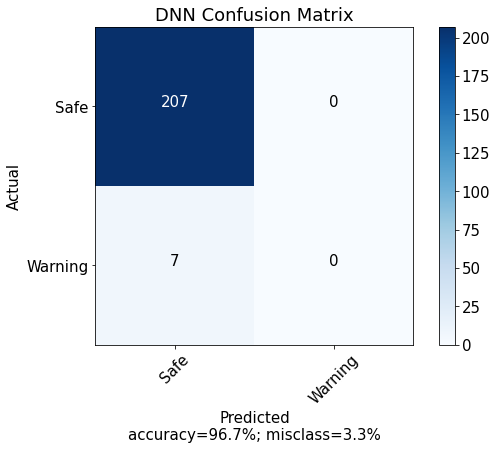

In [ ]:
cm_pred_dnn = confusion_matrix(predict_y, pred)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm_pred_dnn)
plt.figure()
plot_confusion_matrix(cm_pred_dnn, MC_CAT,'DNN Confusion Matrix')

In [ ]:
print (pred)

In [ ]:
#function to plot confusion matrix
from sklearn.metrics import roc_curve, auc

# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', 
                            cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

# Plot an ROC. pred - the predictions, y - the expected output.
def plot_roc(pred,y):
    fpr, tpr, _ = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
MC_CAT =np.array(['Normal','Warning'])
# Compute confusion matrix
cm = confusion_matrix(predict_y, pred)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, MC_CAT)

In [ ]:
# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, MC_CAT, 
        title='Normalized confusion matrix')

In [ ]:
from sklearn.metrics import confusion_matrix
MC_CAT =np.array(['Normal','Warning'])
# Compute confusion matrix
cm = confusion_matrix(predict_y, pred)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix_1(cm, MC_CAT)

In [ ]:
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix_1(cm_normalized, MC_CAT, 
        title='Normalized confusion matrix', cmap=None, normalize=True)

In [ ]:
#Try random forest code
train_data_rf=data.loc[(data['PERIOD_DT'] < '2020-01-01')]
test_data_rf=data.loc[(data['PERIOD_DT'] >= '2020-01-01')]
train_data_rf.tail()

In [ ]:
days_in_year = 365

train_data_rf['SIN_TIME'] = np.sin(2*np.pi*data.DOY/days_in_year)
train_data_rf['COS_TIME'] = np.cos(2*np.pi*data.DOY/days_in_year)

del train_data_rf['PERIOD_DT']
del train_data_rf['DOY']
del train_data_rf['MC']
train_data_rf.drop_duplicates(inplace=True)
train_data_rf.tail()

In [ ]:
days_in_year = 365

test_data_rf['SIN_TIME'] = np.sin(2*np.pi*data.DOY/days_in_year)
test_data_rf['COS_TIME'] = np.cos(2*np.pi*data.DOY/days_in_year)

del test_data_rf['PERIOD_DT']
del test_data_rf['DOY']
test_data_rf.head()

In [ ]:
#Create labels
train_label_rf = train_data_rf.pop('WARNING')
test_label_rf = test_data_rf.pop('WARNING')

In [ ]:
test_label_rf.tail()

In [ ]:
from sklearn import svm
clf_SVM = svm.SVC(kernel='linear')
clf_SVM.fit(train_x_rf,train_y_rf)
pred_svm=clf_SVM.predict(test_x_rf)
pred_svm

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test_y_rf, pred_svm)
print(accuracy)

In [ ]:
cm_svm = confusion_matrix(test_y_rf, pred_svm)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm_svm)
plt.figure()
plot_confusion_matrix_1(cm_svm, MC_CAT)